# Questão 4 da prova 2 de IA

## Lucas Nóbrega e Nathália de Vasconcelos

Enunciado: utilizando a base de clusterização encontrada nesse link (https://drive.google.com/file/d/1_702eOQbimT1HhTuozwMEKV6HHOykLaJ/view), execute os algoritmos de clusterização citados a seguir e compare os resultados.


* Execute os algoritmos de agrupamento K-means e Hierárquico com os seguintes valores de K: 2, 5, 10 e 100. Compare os agrupamento resultantes dos 2 algoritmos.
* Escolha um número fixo de K e altere o parâmetro do K-Means referente ao número máximo de iterações: 1, 10 e 100 e o parâmetro de Linkage do Hierárquico, quais diferenças puderam ser observadas?
* Faça uma comparação entre os 2 algoritmos, qual você acha que teve o melhor desempenho e por quê?

# Pré-processamento de dados

### Importando o dataset da questão

In [1]:
import scipy.io.arff as io
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np

# Aumentar o tamanho do plot na proporção 8/13
x_size = 17
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
# Aumentar o tamanho do plot na proporção 8/13

# Read arff data
with open("Genes_Atividade_IA.arff") as f:
    values = io.loadarff(f)
    f.close()
    
dataset = pd.DataFrame(data=values[0])
#X = dataset.iloc[:, :-1].values
#y = dataset.iloc[:, 20].values

<Figure size 1224x753.231 with 0 Axes>

### Melhorando a visualização da tabela do dataset

In [2]:
print(pd.options.display.max_columns, pd.options.display.max_rows)
pd.options.display.max_columns = 50
print(pd.options.display.max_columns, pd.options.display.max_rows)
#pd.options.display.max_rows = 

20 60
50 60


In [3]:
dataset.describe()

,adipose_tissue,adrenal_gland,animal_ovary,appendix,bladder,bone_marrow,cerebral_cortex,colon,duodenum,endometrium,esophagus,fallopian_tube,gallbladder,heart,kidney,liver,lung,lymph_node,pancreas,placenta,prostate,rectum,salivary_gland,skeletal_muscle,skin,small_intestine,smooth_muscle,spleen,stomach,testis,thyroid,tonsil
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.040157,41.486336,51.338392,52.555181,48.932735,53.852077,45.797667,40.663197,39.632611,52.066032,41.493874,53.691974,57.023709,21.915492,27.728612,35.790131,54.864549,54.294117,35.087462,52.105545,46.389605,42.376928,27.628763,22.053380,35.257338,43.396844,52.185982,56.164531,37.587312,44.472439,72.736881,46.143284
std,195.264717,181.466441,210.726346,252.295704,221.732356,393.758129,123.183344,157.028175,185.991398,186.169270,139.247221,261.725555,314.203534,116.726607,136.411996,336.523288,277.654367,277.993904,1108.114405,242.242244,241.613858,165.470468,308.543568,208.651352,95.223057,193.638153,233.848790,347.561819,207.009834,114.878046,742.846516,222.768691
min,0.000003,0.000003,0.000004,0.000004,0.000004,0.000003,0.000004,0.000003,0.000003,0.000004,0.000004,0.000004,0.000004,0.000002,0.000002,0.000003,0.000004,0.000004,0.000002,0.000004,0.000004,0.000003,0.000003,0.000002,0.000003,0.000003,0.000004,0.000004,0.000003,0.000003,0.000005,0.000003
25%,3.173068,3.105311,3.140023,7.117802,7.087438,1.257345,7.631545,3.071134,2.765053,7.428423,3.506638,7.896982,8.147757,1.569051,2.492157,1.170095,7.812597,3.751913,0.602562,4.128284,7.150531,3.094211,2.414023,0.427236,3.304699,5.983976,4.248427,3.678518,5.874027,6.997996,4.580134,3.174720
50%,12.692271,15.526556,19.625143,21.353406,21.262314,9.430086,19.078863,15.355670,13.825265,21.224067,14.026553,23.690945,20.369393,6.724503,9.968628,5.850474,23.437791,18.759564,2.008539,20.641418,17.876327,15.471057,8.046744,2.136179,16.523495,14.959941,21.242137,22.071107,14.685068,20.993988,22.900670,15.873599
75%,31.730678,34.158423,43.175314,46.265713,42.524627,34.576981,41.973499,33.782474,30.415583,50.937760,35.066382,47.381890,48.886544,15.690507,24.921571,17.551423,46.875582,48.774865,6.025616,45.411120,42.903184,34.036326,18.775735,8.544717,36.351689,32.911870,42.484273,47.820732,29.370135,45.486973,54.961609,38.096639
max,7377.382624,5216.922745,4827.785071,7644.519332,7548.121360,12623.741610,2663.409328,3528.732999,5275.721159,6460.605882,3857.301972,9733.029992,12201.266550,4512.141526,5587.416115,13058.258680,9707.151804,7931.543465,48970.179710,9032.684565,9585.286431,3945.119614,13529.258260,7732.968610,1939.858329,5032.524122,8322.669088,12036.110500,7486.447452,2554.268510,32253.304180,6231.975147


### Visualizando o dataset através de um box plot, a fim de encontrar possíveis _outliers_

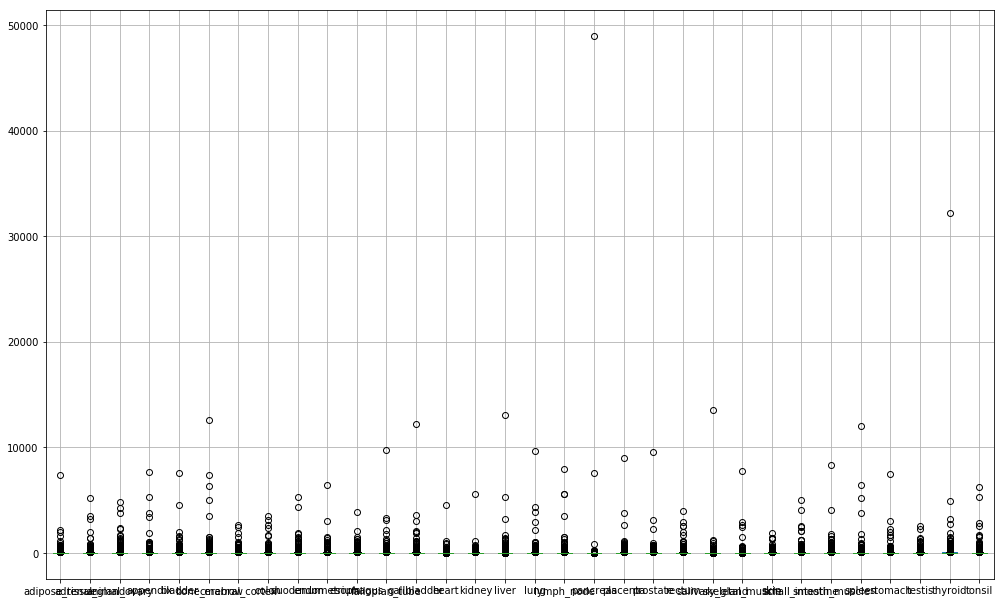

In [4]:
# Aumentar o tamanho do plot na proporção 8/13
x_size = 17
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
# Aumentar o tamanho do plot na proporção 8/13
dataset.boxplot()

### Detectamos _outliers_, logo faz-se necessário um ajuste na escala

In [5]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(dataset[dataset.columns[:-1]])

In [6]:
import numpy as np
a = np.array(dataset[dataset.columns[:-1]])

In [7]:
df = pd.DataFrame(transformer.transform(a))

### Visualizando o boxplot depois de ter sua escala reajustada, percebe-se a presença de um _outlier_ na coluna 18...

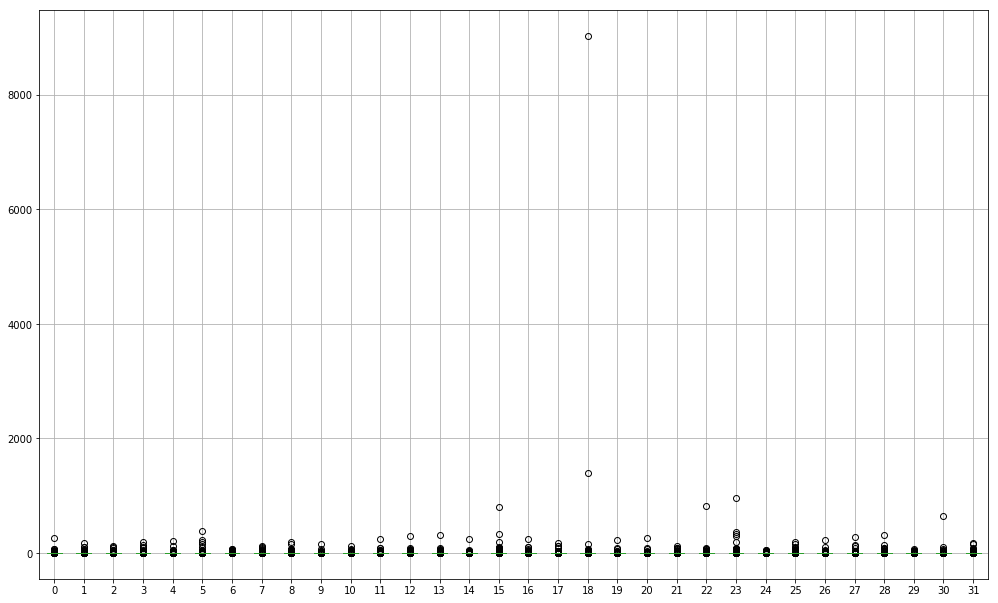

In [8]:
# Aumentar o tamanho do plot na proporção 8/13
x_size = 17
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
# Aumentar o tamanho do plot na proporção 8/13
df.boxplot()

### Tentando localizar a instância com um valor acima de 9000

In [9]:
a = df.loc[df[18] > 9000]

In [10]:
a

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
1940,-0.377778,-0.5,0.490196,-0.5,-0.59,-0.283019,-0.555555,-0.49,0.2,-0.478049,-0.444444,-0.58,-0.5,0.15873,-0.444444,-0.357143,-0.58,-0.408333,9029.629629,0.4,-0.49,-0.5,0.655738,-0.236842,-0.45,-0.111111,-0.544444,-0.416667,-0.375,-0.472727,-0.454545,-0.454545


In [11]:
aux = np.array(df[18])

### Substituindo o valor desse _outlier_ pela mediana da coluna 18 do dataset

In [12]:
df[18] = df[18].replace(9029.629629, np.nanmedian(aux))

# Identificando o número de classes

In [13]:
class_array = dataset.iloc[:, 32]

### Significa que existem 2000 classes, ou seja, uma para cada instância.

In [14]:
class_array.describe()

count                   2000
unique                  2000
top       b'ENSG00000038295'
freq                       1
Name: class, dtype: object

In [15]:
a = np.array(class_array.value_counts())

In [16]:
a.sum()

2000

# 1. Execução dos algoritmos de aprendizagem de máquina K-means e Hierárquico para resolver um problema de agrupamento

Execute os algoritmos de agrupamento K-means e Hierárquico com os seguintes valores de K: 2, 5, 10 e 100. Compare os agrupamentos resultantes dos 2 algoritmos.

### Separando as entradas do problema na variável X e a saída esperada do problema na variável y

In [17]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 32].values

##  K-means, K = 2

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [21]:
a = np.array(kmeans.labels_)
a.sum()

1

### Perceba que a soma da quantidade de rótulos foi igual a 1 devido ao _outlier_ na coluna ```"pancreas"``` que causou um desbalanceamento nas classes

In [22]:
unique, counts = np.unique(a, return_counts=True)
dicionario = dict(zip(unique, counts))
print(dicionario)
lista = list(dicionario.items())
class_instances = pd.DataFrame(lista, columns=["Classe", "Nº Instancias"])
class_instances

{0: 1999, 1: 1}


,Classe,Nº Instancias
0,0,1999
1,1,1


In [23]:
kmeans.cluster_centers_[0]

array([39.05873463, 41.50708976, 51.34443912, 52.58058144, 48.95703592,
       53.87901696, 45.82057733, 40.68338489, 39.64275479, 52.09186528,
       41.51463154, 53.7184383 , 57.05223534, 21.9219698 , 27.74248304,
       35.80803475, 54.89160398, 54.32108966, 10.60767637, 52.11302411,
       46.41263207, 42.39812701, 27.63319137, 22.06430544, 35.27414936,
       43.41256626, 52.21187541, 56.19078705, 37.60317633, 44.49328609,
       72.77326733, 46.16636715])

### Isso é confirmado pois é possível ver que ele foi capturado no ```kmeans.cluster_centers_[1]``` (valor 4.89e+4)

In [24]:
kmeans.cluster_centers_[1]

array([1.90384068e+00, 3.10531000e-06, 3.92502851e+01, 1.77945050e+00,
       3.54371895e-01, 3.14336000e-06, 3.81577000e-06, 3.07113403e-01,
       1.93553711e+01, 4.24481333e-01, 3.50664000e-06, 7.89698174e-01,
       4.07388000e-06, 8.96600403e+00, 2.49216000e-06, 2.92524000e-06,
       7.81259703e-01, 3.75191271e-01, 4.89701797e+04, 3.71545526e+01,
       3.57526536e-01, 3.09421000e-06, 1.87757351e+01, 2.13617917e-01,
       1.65234951e+00, 1.19679527e+01, 4.24842730e-01, 3.67851788e+00,
       5.87402703e+00, 2.79919837e+00, 4.58013000e-06, 3.17472000e-06])

### Adicionando a coluna calculada ```kmeans.label_``` ao conjunto de dados

In [25]:
dataset["K-classes"] = kmeans.labels_

### Provado que a única instância da classe 1 que contém o valor com _outlier_, ou seja, o _outilier_ interfere diretamente na análise de dados.

In [26]:
dataset.loc[ dataset["pancreas"] > 40000]

,adipose_tissue,adrenal_gland,animal_ovary,appendix,bladder,bone_marrow,cerebral_cortex,colon,duodenum,endometrium,esophagus,fallopian_tube,gallbladder,heart,kidney,liver,lung,lymph_node,pancreas,placenta,prostate,rectum,salivary_gland,skeletal_muscle,skin,small_intestine,smooth_muscle,spleen,stomach,testis,thyroid,tonsil,class,K-classes
1940,1.903841,0.000003,39.250285,1.77945,0.354372,0.000003,0.000004,0.307113,19.355371,0.424481,0.000004,0.789698,0.000004,8.966004,0.000002,0.000003,0.78126,0.375191,48970.17971,37.154553,0.357527,0.000003,18.775735,0.213618,1.65235,11.967953,0.424843,3.678518,5.874027,2.799198,0.000005,0.000003,b'ENSG00000091704',1


## K-means, K = 5

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [28]:
a = np.array(kmeans.labels_)

### Analisando os rótulos de saída do algoritmo, percebe-se que temos 3 classes, de forma que a classe 0 é afetada pelo desbalanceamento das classes devido ao _outlier_ presente na coluna ```"pancreas"```

In [29]:
unique, counts = np.unique(a, return_counts=True)
dicionario = dict(zip(unique, counts))
print(dicionario)
lista = list(dicionario.items())
class_instances = pd.DataFrame(lista, columns=["Classe", "Nº Instancias"])
class_instances

{0: 1995, 1: 1, 2: 2, 3: 1, 4: 1}


,Classe,Nº Instancias
0,0,1995
1,1,1
2,2,2
3,3,1
4,4,1


### A quantidade de instâncias de cada classe afetou diretamente na classificação das classes, devido ao número de _outliers_ nas amostras.

### Adicionando a coluna calculada ```kmeans.label_``` ao conjunto de dados

In [30]:
dataset["K-classes"] = kmeans.labels_

In [31]:
dataset.loc[dataset["K-classes"] > 0]

,adipose_tissue,adrenal_gland,animal_ovary,appendix,bladder,bone_marrow,cerebral_cortex,colon,duodenum,endometrium,esophagus,fallopian_tube,gallbladder,heart,kidney,liver,lung,lymph_node,pancreas,placenta,prostate,rectum,salivary_gland,skeletal_muscle,skin,small_intestine,smooth_muscle,spleen,stomach,testis,thyroid,tonsil,class,K-classes
591,0.317307,1.863187,0.000004,0.711780,0.708744,0.628672,0.381577,0.307113,0.000003,0.000004,0.350664,0.394849,0.814776,6.724503,1.246079,0.000003,0.390630,26.263389,0.000002,0.412828,0.715053,0.309421,1.341124,0.000002,2.313289,0.000003,0.424843,0.367852,0.000003,2.449299,32253.304180,0.952416,b'ENSG00000042832',3
1315,2027.590321,1400.495332,2296.141680,7644.519332,4514.697940,3463.984873,2430.647195,2346.346398,1800.049515,6460.605882,3857.301972,3293.041385,3637.973632,428.126692,799.982414,1292.954824,4394.585827,7931.543465,188.802629,3798.020932,3128.357190,2558.912879,992.431712,183.711409,1391.278291,2600.037730,8322.669088,5201.424283,2232.130272,1137.174337,2729.759911,6231.975147,b'ENSG00000075624',2
1718,7377.382624,3490.369741,4827.785071,5295.644677,7548.121360,6349.591147,1938.412520,3095.703101,4330.073027,2996.838208,2114.502808,3158.792695,12201.266550,1187.995534,5587.416115,5344.408289,9707.151804,5612.861412,843.586214,9032.684565,2288.169831,3945.119614,1166.777824,324.699234,1311.965514,5032.524122,4112.477630,12036.110500,3072.116138,1445.086157,4919.064000,2809.627104,b'ENSG00000087086',2
1874,28.557610,46.579667,54.950399,1854.187417,836.317672,12623.741610,19.078863,546.661857,5275.721159,114.609960,199.878375,110.557744,3055.408986,26.898012,32.398042,125.785198,2179.714570,1485.757432,18.076847,202.285898,60.779511,519.827526,13529.258260,2.136179,99.140971,2058.487869,195.427656,1364.730134,7486.447452,24.492986,87.022547,1561.962187,b'ENSG00000090382',4
1940,1.903841,0.000003,39.250285,1.779450,0.354372,0.000003,0.000004,0.307113,19.355371,0.424481,0.000004,0.789698,0.000004,8.966004,0.000002,0.000003,0.781260,0.375191,48970.179710,37.154553,0.357527,0.000003,18.775735,0.213618,1.652350,11.967953,0.424843,3.678518,5.874027,2.799198,0.000005,0.000003,b'ENSG00000091704',1


### Acima podemos ver as instâncias que pertencem às demais classes. Em cada uma delas existe um _outlier_ que altera o comportamento do algoritmo.

## K-means, K = 10

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

In [33]:
a = np.array(kmeans.labels_)

## Analisando os rótulos de saída do algoritmo, percebem-se 3 classes, de forma que a classe 1 continua sendo afetada pelo desbalanceamento de classes causado pelo _outlier_ presente na coluna ```"pancreas"```

In [34]:
unique, counts = np.unique(a, return_counts=True)
dicionario = dict(zip(unique, counts))
print(dicionario)
lista = list(dicionario.items())
class_instances = pd.DataFrame(lista, columns=["Classe", "Nº Instancias"])
class_instances

{0: 1925, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 66, 7: 1, 8: 2, 9: 1}


,Classe,Nº Instancias
0,0,1925
1,1,1
2,2,1
3,3,1
4,4,1
5,5,1
6,6,66
7,7,1
8,8,2
9,9,1


### Podemos perceber uma melhoria, com a classe 6 possuindo 66 instâncias, mas pode ser que todas elas sejam _outliers_. 

### Adicionando a coluna calculada ```kmeans.label_``` ao conjunto de dados

In [35]:
dataset["K-classes"] = kmeans.labels_

In [36]:
dataset.loc[(dataset["K-classes"] > 0) & (dataset["K-classes"] != 6)]

,adipose_tissue,adrenal_gland,animal_ovary,appendix,bladder,bone_marrow,cerebral_cortex,colon,duodenum,endometrium,esophagus,fallopian_tube,gallbladder,heart,kidney,liver,lung,lymph_node,pancreas,placenta,prostate,rectum,salivary_gland,skeletal_muscle,skin,small_intestine,smooth_muscle,spleen,stomach,testis,thyroid,tonsil,class,K-classes
393,621.921288,586.903809,726.130275,3459.251765,1998.657487,644.389201,450.261176,786.210311,1476.538312,827.738599,511.969171,1772.872400,2049.160960,179.320080,453.572584,532.393163,3921.923707,5612.861412,70.298851,346.775824,507.687681,1079.879800,565.954301,66.221554,591.541126,2133.287574,1291.521900,6463.155915,1527.247028,199.442884,609.157832,5352.577737,b'ENSG00000019582',8
510,2138.647694,794.959656,3768.027372,3800.906260,1587.586089,1518.243824,2663.409328,3528.732999,1139.201844,1073.937771,999.391875,1113.474425,1861.762542,342.949654,495.939254,476.813657,2925.817586,3549.309422,148.631857,2613.203533,793.708910,2558.912879,482.804617,123.898392,343.688699,2456.422297,1797.084749,3833.015631,1715.215893,1091.687363,751.141989,2533.426473,b'ENSG00000034510',8
591,0.317307,1.863187,0.000004,0.711780,0.708744,0.628672,0.381577,0.307113,0.000003,0.000004,0.350664,0.394849,0.814776,6.724503,1.246079,0.000003,0.390630,26.263389,0.000002,0.412828,0.715053,0.309421,1.341124,0.000002,2.313289,0.000003,0.424843,0.367852,0.000003,2.449299,32253.304180,0.952416,b'ENSG00000042832',4
1315,2027.590321,1400.495332,2296.141680,7644.519332,4514.697940,3463.984873,2430.647195,2346.346398,1800.049515,6460.605882,3857.301972,3293.041385,3637.973632,428.126692,799.982414,1292.954824,4394.585827,7931.543465,188.802629,3798.020932,3128.357190,2558.912879,992.431712,183.711409,1391.278291,2600.037730,8322.669088,5201.424283,2232.130272,1137.174337,2729.759911,6231.975147,b'ENSG00000075624',5
1657,1.903841,1.552656,3.925029,2.847121,3.543719,3.143362,3.815773,2.764021,2.488548,16.979253,2.805311,9733.029992,4.073879,0.672450,2.492157,5.850474,3.906299,7.503825,0.200854,8.256567,7.150531,6.188423,2.145798,1.068090,9.914097,2.094392,4.248427,3.678518,2.643312,17.494990,1.832054,3.174720,b'ENSG00000085465',7
1718,7377.382624,3490.369741,4827.785071,5295.644677,7548.121360,6349.591147,1938.412520,3095.703101,4330.073027,2996.838208,2114.502808,3158.792695,12201.266550,1187.995534,5587.416115,5344.408289,9707.151804,5612.861412,843.586214,9032.684565,2288.169831,3945.119614,1166.777824,324.699234,1311.965514,5032.524122,4112.477630,12036.110500,3072.116138,1445.086157,4919.064000,2809.627104,b'ENSG00000087086',2
1874,28.557610,46.579667,54.950399,1854.187417,836.317672,12623.741610,19.078863,546.661857,5275.721159,114.609960,199.878375,110.557744,3055.408986,26.898012,32.398042,125.785198,2179.714570,1485.757432,18.076847,202.285898,60.779511,519.827526,13529.258260,2.136179,99.140971,2058.487869,195.427656,1364.730134,7486.447452,24.492986,87.022547,1561.962187,b'ENSG00000090382',3
1933,0.317307,0.000003,0.000004,0.000004,0.000004,0.000003,0.000004,1.228454,2.765053,0.000004,0.000004,0.789698,8.147757,0.000002,34.890199,13058.258680,15.625194,0.000004,4.017077,0.000004,0.000004,0.928263,0.000003,0.000002,0.000003,1.196795,0.000004,0.000004,5.874027,0.349900,0.000005,0.000003,b'ENSG00000091583',9
1940,1.903841,0.000003,39.250285,1.779450,0.354372,0.000003,0.000004,0.307113,19.355371,0.424481,0.000004,0.789698,0.000004,8.966004,0.000002,0.000003,0.781260,0.375191,48970.179710,37.154553,0.357527,0.000003,18.775735,0.213618,1.652350,11.967953,0.424843,3.678518,5.874027,2.799198,0.000005,0.000003,b'ENSG00000091704',1


## K-means, K = 100

In [37]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=100, random_state=0).fit(X)

In [38]:
a = np.array(kmeans.labels_)

In [39]:
unique, counts = np.unique(a, return_counts=True)
dicionario = dict(zip(unique, counts))
print(dicionario)
lista = list(dicionario.items())
class_instances = pd.DataFrame(lista, columns=["Classe", "Nº Instancias"])
class_instances

{0: 38, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 86, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 13, 23: 1, 24: 2, 25: 1, 26: 1, 27: 1, 28: 1, 29: 4, 30: 24, 31: 2, 32: 3, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 448, 39: 1, 40: 1, 41: 1, 42: 1, 43: 73, 44: 2, 45: 2, 46: 1, 47: 1, 48: 4, 49: 5, 50: 9, 51: 2, 52: 1, 53: 1, 54: 9, 55: 519, 56: 1, 57: 5, 58: 5, 59: 6, 60: 22, 61: 1, 62: 3, 63: 1, 64: 7, 65: 8, 66: 1, 67: 2, 68: 1, 69: 1, 70: 2, 71: 1, 72: 47, 73: 12, 74: 4, 75: 1, 76: 8, 77: 2, 78: 1, 79: 160, 80: 1, 81: 15, 82: 8, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 5, 89: 25, 90: 7, 91: 300, 92: 13, 93: 1, 94: 1, 95: 28, 96: 1, 97: 1, 98: 3, 99: 1}


,Classe,Nº Instancias
0,0,38
1,1,1
2,2,1
3,3,1
4,4,1
5,5,1
6,6,1
7,7,1
8,8,1
9,9,1


### Observando quais classes possuem mais de 10 instâncias...


In [40]:
class_instances.loc[class_instances["Nº Instancias"] > 10]

,Classe,Nº Instancias
0,0,38
16,16,86
22,22,13
30,30,24
38,38,448
43,43,73
55,55,519
60,60,22
72,72,47
73,73,12


##### É possível perceber que o número de instâncias em algumas classes aumentou consideravelmente. Isso pode ser explicado pelo fato de que existem mais classes a serem alocadas, logo, os _outliers_ podem ficar em classes individuais sem atrapalhar tanto o algoritmo como acontecia com as outras classes para um k menor.

### Adicionando a coluna calculada ```kmeans.label_``` ao conjunto de dados

In [41]:
dataset["K-classes"] = kmeans.labels_

In [42]:
dataset.loc[ dataset["pancreas"] > 40000]

,adipose_tissue,adrenal_gland,animal_ovary,appendix,bladder,bone_marrow,cerebral_cortex,colon,duodenum,endometrium,esophagus,fallopian_tube,gallbladder,heart,kidney,liver,lung,lymph_node,pancreas,placenta,prostate,rectum,salivary_gland,skeletal_muscle,skin,small_intestine,smooth_muscle,spleen,stomach,testis,thyroid,tonsil,class,K-classes
1940,1.903841,0.000003,39.250285,1.77945,0.354372,0.000003,0.000004,0.307113,19.355371,0.424481,0.000004,0.789698,0.000004,8.966004,0.000002,0.000003,0.78126,0.375191,48970.17971,37.154553,0.357527,0.000003,18.775735,0.213618,1.65235,11.967953,0.424843,3.678518,5.874027,2.799198,0.000005,0.000003,b'ENSG00000091704',1


## Hierárquico, K = 2

In [43]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage="ward").fit(X)

In [44]:
a = np.array(clustering.labels_)

In [45]:
unique, counts = np.unique(a, return_counts=True)
dicionario = dict(zip(unique, counts))
print(dicionario)
lista = list(dicionario.items())
class_instances = pd.DataFrame(lista, columns=["Classe", "Nº Instancias"])
class_instances

{0: 1999, 1: 1}


,Classe,Nº Instancias
0,0,1999
1,1,1


In [46]:
dataset.drop("K-classes", axis=1, inplace=True)

In [47]:
dataset["K-classes-hierar"] = clustering.labels_

In [48]:
dataset.loc[ dataset["pancreas"] > 40000]

,adipose_tissue,adrenal_gland,animal_ovary,appendix,bladder,bone_marrow,cerebral_cortex,colon,duodenum,endometrium,esophagus,fallopian_tube,gallbladder,heart,kidney,liver,lung,lymph_node,pancreas,placenta,prostate,rectum,salivary_gland,skeletal_muscle,skin,small_intestine,smooth_muscle,spleen,stomach,testis,thyroid,tonsil,class,K-classes-hierar
1940,1.903841,0.000003,39.250285,1.77945,0.354372,0.000003,0.000004,0.307113,19.355371,0.424481,0.000004,0.789698,0.000004,8.966004,0.000002,0.000003,0.78126,0.375191,48970.17971,37.154553,0.357527,0.000003,18.775735,0.213618,1.65235,11.967953,0.424843,3.678518,5.874027,2.799198,0.000005,0.000003,b'ENSG00000091704',1


##  Hierárquico, K = 5

In [49]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage="ward").fit(X)

In [50]:
a = np.array(clustering.labels_)

### Percebemos que a classe 2 possui muitas instâncias quando comparamos com as outras classes, o que caracteriza um desbalanceamento de classes. Com o desbalanceamento, isto prejudica significativamente a classificação do algoritmo e separação em grupos.

In [51]:
unique, counts = np.unique(a, return_counts=True)
dicionario = dict(zip(unique, counts))
print(dicionario)
lista = list(dicionario.items())
class_instances = pd.DataFrame(lista, columns=["Classe", "Nº Instancias"])
class_instances

{0: 4, 1: 1, 2: 1993, 3: 1, 4: 1}


,Classe,Nº Instancias
0,0,4
1,1,1
2,2,1993
3,3,1
4,4,1


In [52]:
dataset["K-classes-hierar"] = clustering.labels_

In [53]:
dataset.loc[dataset["K-classes-hierar"] != 2]

,adipose_tissue,adrenal_gland,animal_ovary,appendix,bladder,bone_marrow,cerebral_cortex,colon,duodenum,endometrium,esophagus,fallopian_tube,gallbladder,heart,kidney,liver,lung,lymph_node,pancreas,placenta,prostate,rectum,salivary_gland,skeletal_muscle,skin,small_intestine,smooth_muscle,spleen,stomach,testis,thyroid,tonsil,class,K-classes-hierar
393,621.921288,586.903809,726.130275,3459.251765,1998.657487,644.389201,450.261176,786.210311,1476.538312,827.738599,511.969171,1772.872400,2049.160960,179.320080,453.572584,532.393163,3921.923707,5612.861412,70.298851,346.775824,507.687681,1079.879800,565.954301,66.221554,591.541126,2133.287574,1291.521900,6463.155915,1527.247028,199.442884,609.157832,5352.577737,b'ENSG00000019582',0
510,2138.647694,794.959656,3768.027372,3800.906260,1587.586089,1518.243824,2663.409328,3528.732999,1139.201844,1073.937771,999.391875,1113.474425,1861.762542,342.949654,495.939254,476.813657,2925.817586,3549.309422,148.631857,2613.203533,793.708910,2558.912879,482.804617,123.898392,343.688699,2456.422297,1797.084749,3833.015631,1715.215893,1091.687363,751.141989,2533.426473,b'ENSG00000034510',0
591,0.317307,1.863187,0.000004,0.711780,0.708744,0.628672,0.381577,0.307113,0.000003,0.000004,0.350664,0.394849,0.814776,6.724503,1.246079,0.000003,0.390630,26.263389,0.000002,0.412828,0.715053,0.309421,1.341124,0.000002,2.313289,0.000003,0.424843,0.367852,0.000003,2.449299,32253.304180,0.952416,b'ENSG00000042832',3
1315,2027.590321,1400.495332,2296.141680,7644.519332,4514.697940,3463.984873,2430.647195,2346.346398,1800.049515,6460.605882,3857.301972,3293.041385,3637.973632,428.126692,799.982414,1292.954824,4394.585827,7931.543465,188.802629,3798.020932,3128.357190,2558.912879,992.431712,183.711409,1391.278291,2600.037730,8322.669088,5201.424283,2232.130272,1137.174337,2729.759911,6231.975147,b'ENSG00000075624',0
1718,7377.382624,3490.369741,4827.785071,5295.644677,7548.121360,6349.591147,1938.412520,3095.703101,4330.073027,2996.838208,2114.502808,3158.792695,12201.266550,1187.995534,5587.416115,5344.408289,9707.151804,5612.861412,843.586214,9032.684565,2288.169831,3945.119614,1166.777824,324.699234,1311.965514,5032.524122,4112.477630,12036.110500,3072.116138,1445.086157,4919.064000,2809.627104,b'ENSG00000087086',0
1874,28.557610,46.579667,54.950399,1854.187417,836.317672,12623.741610,19.078863,546.661857,5275.721159,114.609960,199.878375,110.557744,3055.408986,26.898012,32.398042,125.785198,2179.714570,1485.757432,18.076847,202.285898,60.779511,519.827526,13529.258260,2.136179,99.140971,2058.487869,195.427656,1364.730134,7486.447452,24.492986,87.022547,1561.962187,b'ENSG00000090382',4
1940,1.903841,0.000003,39.250285,1.779450,0.354372,0.000003,0.000004,0.307113,19.355371,0.424481,0.000004,0.789698,0.000004,8.966004,0.000002,0.000003,0.781260,0.375191,48970.179710,37.154553,0.357527,0.000003,18.775735,0.213618,1.652350,11.967953,0.424843,3.678518,5.874027,2.799198,0.000005,0.000003,b'ENSG00000091704',1


## Hierárquico, K = 10

In [54]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage="ward").fit(X)

In [55]:
a = np.array(clustering.labels_)

In [56]:
unique, counts = np.unique(a, return_counts=True)
dicionario = dict(zip(unique, counts))
print(dicionario)
lista = list(dicionario.items())
class_instances = pd.DataFrame(lista, columns=["Classe", "Nº Instancias"])
class_instances

{0: 60, 1: 1, 2: 1931, 3: 1, 4: 1, 5: 1, 6: 2, 7: 1, 8: 1, 9: 1}


,Classe,Nº Instancias
0,0,60
1,1,1
2,2,1931
3,3,1
4,4,1
5,5,1
6,6,2
7,7,1
8,8,1
9,9,1


In [57]:
dataset["K-classes-hierar"] = clustering.labels_

In [58]:
dataset.loc[(dataset["K-classes-hierar"] != 2) & (dataset["K-classes-hierar"] != 0)]

,adipose_tissue,adrenal_gland,animal_ovary,appendix,bladder,bone_marrow,cerebral_cortex,colon,duodenum,endometrium,esophagus,fallopian_tube,gallbladder,heart,kidney,liver,lung,lymph_node,pancreas,placenta,prostate,rectum,salivary_gland,skeletal_muscle,skin,small_intestine,smooth_muscle,spleen,stomach,testis,thyroid,tonsil,class,K-classes-hierar
393,621.921288,586.903809,726.130275,3459.251765,1998.657487,644.389201,450.261176,786.210311,1476.538312,827.738599,511.969171,1772.872400,2049.160960,179.320080,453.572584,532.393163,3921.923707,5612.861412,70.298851,346.775824,507.687681,1079.879800,565.954301,66.221554,591.541126,2133.287574,1291.521900,6463.155915,1527.247028,199.442884,609.157832,5352.577737,b'ENSG00000019582',6
510,2138.647694,794.959656,3768.027372,3800.906260,1587.586089,1518.243824,2663.409328,3528.732999,1139.201844,1073.937771,999.391875,1113.474425,1861.762542,342.949654,495.939254,476.813657,2925.817586,3549.309422,148.631857,2613.203533,793.708910,2558.912879,482.804617,123.898392,343.688699,2456.422297,1797.084749,3833.015631,1715.215893,1091.687363,751.141989,2533.426473,b'ENSG00000034510',6
591,0.317307,1.863187,0.000004,0.711780,0.708744,0.628672,0.381577,0.307113,0.000003,0.000004,0.350664,0.394849,0.814776,6.724503,1.246079,0.000003,0.390630,26.263389,0.000002,0.412828,0.715053,0.309421,1.341124,0.000002,2.313289,0.000003,0.424843,0.367852,0.000003,2.449299,32253.304180,0.952416,b'ENSG00000042832',7
1315,2027.590321,1400.495332,2296.141680,7644.519332,4514.697940,3463.984873,2430.647195,2346.346398,1800.049515,6460.605882,3857.301972,3293.041385,3637.973632,428.126692,799.982414,1292.954824,4394.585827,7931.543465,188.802629,3798.020932,3128.357190,2558.912879,992.431712,183.711409,1391.278291,2600.037730,8322.669088,5201.424283,2232.130272,1137.174337,2729.759911,6231.975147,b'ENSG00000075624',8
1657,1.903841,1.552656,3.925029,2.847121,3.543719,3.143362,3.815773,2.764021,2.488548,16.979253,2.805311,9733.029992,4.073879,0.672450,2.492157,5.850474,3.906299,7.503825,0.200854,8.256567,7.150531,6.188423,2.145798,1.068090,9.914097,2.094392,4.248427,3.678518,2.643312,17.494990,1.832054,3.174720,b'ENSG00000085465',9
1718,7377.382624,3490.369741,4827.785071,5295.644677,7548.121360,6349.591147,1938.412520,3095.703101,4330.073027,2996.838208,2114.502808,3158.792695,12201.266550,1187.995534,5587.416115,5344.408289,9707.151804,5612.861412,843.586214,9032.684565,2288.169831,3945.119614,1166.777824,324.699234,1311.965514,5032.524122,4112.477630,12036.110500,3072.116138,1445.086157,4919.064000,2809.627104,b'ENSG00000087086',5
1874,28.557610,46.579667,54.950399,1854.187417,836.317672,12623.741610,19.078863,546.661857,5275.721159,114.609960,199.878375,110.557744,3055.408986,26.898012,32.398042,125.785198,2179.714570,1485.757432,18.076847,202.285898,60.779511,519.827526,13529.258260,2.136179,99.140971,2058.487869,195.427656,1364.730134,7486.447452,24.492986,87.022547,1561.962187,b'ENSG00000090382',4
1933,0.317307,0.000003,0.000004,0.000004,0.000004,0.000003,0.000004,1.228454,2.765053,0.000004,0.000004,0.789698,8.147757,0.000002,34.890199,13058.258680,15.625194,0.000004,4.017077,0.000004,0.000004,0.928263,0.000003,0.000002,0.000003,1.196795,0.000004,0.000004,5.874027,0.349900,0.000005,0.000003,b'ENSG00000091583',3
1940,1.903841,0.000003,39.250285,1.779450,0.354372,0.000003,0.000004,0.307113,19.355371,0.424481,0.000004,0.789698,0.000004,8.966004,0.000002,0.000003,0.781260,0.375191,48970.179710,37.154553,0.357527,0.000003,18.775735,0.213618,1.652350,11.967953,0.424843,3.678518,5.874027,2.799198,0.000005,0.000003,b'ENSG00000091704',1


## Hierárquico, K = 100

In [59]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=100, affinity='euclidean', linkage="ward").fit(X)

In [60]:
a = np.array(clustering.labels_)

In [61]:
unique, counts = np.unique(a, return_counts=True)
dicionario = dict(zip(unique, counts))
print(dicionario)
lista = list(dicionario.items())
class_instances = pd.DataFrame(lista, columns=["Classe", "Nº Instancias"])
class_instances

{0: 564, 1: 2, 2: 10, 3: 28, 4: 10, 5: 12, 6: 8, 7: 6, 8: 4, 9: 69, 10: 9, 11: 34, 12: 5, 13: 2, 14: 2, 15: 2, 16: 15, 17: 3, 18: 13, 19: 17, 20: 333, 21: 8, 22: 2, 23: 320, 24: 2, 25: 1, 26: 1, 27: 2, 28: 2, 29: 60, 30: 1, 31: 1, 32: 1, 33: 3, 34: 20, 35: 1, 36: 2, 37: 1, 38: 4, 39: 1, 40: 19, 41: 4, 42: 1, 43: 6, 44: 203, 45: 1, 46: 2, 47: 2, 48: 33, 49: 79, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 2, 58: 4, 59: 1, 60: 4, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 3, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 8, 89: 1, 90: 4, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1}


,Classe,Nº Instancias
0,0,564
1,1,2
2,2,10
3,3,28
4,4,10
5,5,12
6,6,8
7,7,6
8,8,4
9,9,69


### Com k = 100 percebemos que há uma diversidade maior de classes com mais de dez instâncias

In [63]:
class_instances.loc[class_instances["Nº Instancias"] > 10]

,Classe,Nº Instancias
0,0,564
3,3,28
5,5,12
9,9,69
11,11,34
16,16,15
18,18,13
19,19,17
20,20,333
23,23,320


##### Para k = 100, percebeu-se que as classes com maior quantidade de instâncias foram as iniciais no Hierárquico. Já no K-Means, as classes intermediárias apresentaram a maior quantidade de instâncias. 

# 2.1. Fixar K no K-means e alterar o parâmetro de quantidade máxima de iterações

Escolha um número fixo de K e altere o parâmetro do K-Means referente ao número máximo de iterações: 1, 10 e 100.